In [1]:
using BeamLib: IsotropicArray, steer, capon
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])

# test signal generation
Θ = deg2rad.([10, 80])
d = length(Θ)
fs = 8e3
t = transpose(0:1/fs:1)
s1 = sin.(2π*t*300)
s2 = cos.(2π*t*400)

s = steer(pa, fc, Θ')*[s1; s2]
n = (0.1/sqrt(2))*(randn(size(s)) + 1im*randn(size(s)))
X = s + n
Rxx = 1/size(X,2) * X*X'

# Capon spectrum 
# Same as steering capon_weights / mpdr_weights 
# but using the capon function is more convenient for
# DoA estimation
ϕaxis = LinRange(-90, 90, 360)
P = capon(pa, Rxx, fc, deg2rad.(ϕaxis'))

360-element Vector{Float64}:
 0.3467458067079882
 0.34614898182586595
 0.34436110174789386
 0.34139032480142306
 0.3372514497087855
 0.33196755571035413
 0.32557198637283824
 0.31811039412718617
 0.3096425266805846
 0.3002434365425514
 ⋮
 0.36350215746669295
 0.35444909063419344
 0.3466599841882499
 0.34012227931594896
 0.33481558438449566
 0.33071735189908547
 0.32780678480083014
 0.3260674372696961
 0.3254888486096117

In [2]:
# Find DoAs
import Peaks
ϕaxis[Peaks.findmaxima(P).indices]

2-element Vector{Float64}:
  9.777158774373248
 79.97214484679665

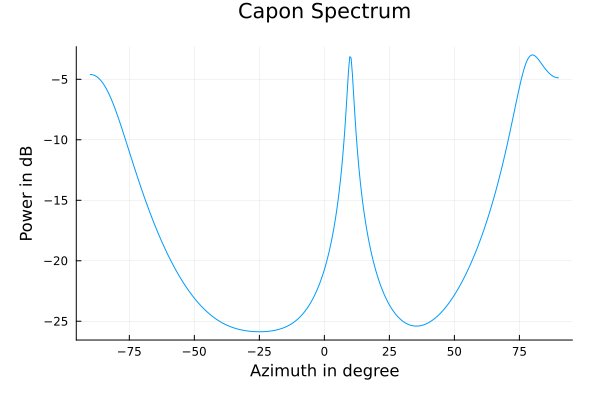

In [3]:
using Plots
import Measures
p1 = plot(ϕaxis, 10*log10.(P))
plot!(title="Capon Spectrum", legend = false, margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")